# Optimization demo

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
import numpy as np
plt.style.use('seaborn-white')

Here is a hypothetical loss function. We have two parameters $a$ and $b$.

In [2]:
def loss(a, b):
    return 2*(a+b)**2 + 0.2*(a-b)**2

Here is a contour plot of our loss function. Each contour line draws values of $a$ and $b$ with constant loss.

In [3]:
N = 500
a = np.linspace(-10, 10, num=N)
b = np.linspace(-10, 10, num=N)

In [4]:
l = np.ndarray((N, N))
for i in range(N):
    for j in range(N):
        l[i][j] = loss(a[i], b[j])

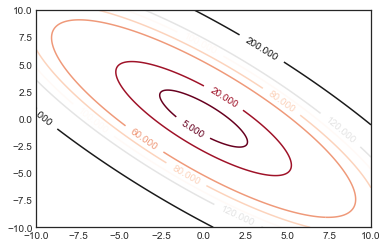

In [5]:
levels = [5, 20, 60, 80, 100, 120, 200]
contours = plt.contour(a, b, l, levels, cmap='RdGy')
plt.clabel(contours, inline=1, fontsize=10)
plt.show()

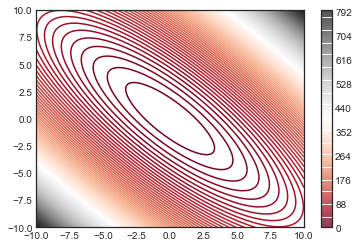

In [6]:
contours = plt.contour(a, b, l, 100, cmap='RdGy')
plt.colorbar()
plt.show()

## Gradient Descent

Check that $\frac{\partial loss}{\partial a} = 4.4a + 3.6b$ and that $\frac{\partial loss}{\partial a} =  3.6a + 4.4b$

In [7]:
def gradient_loss(a, b):
    return np.array([4.4*a + 3.6*b,  4.4*b + 3.6*a])

In [8]:
def gradient_descent(a0, b0, N, lr):
    a = np.zeros(N)
    b = np.zeros(N)
    a[0] = a0
    b[0] = b0
    for i in range(N-1):
        grad = gradient_loss(a[i], b[i])
        a[i+1] = a[i] - lr*grad[0]
        b[i+1] = b[i] - lr*grad[1]
    return a, b

In [9]:
at, bt = gradient_descent(-7.5, -2.5, 30, 0.23)

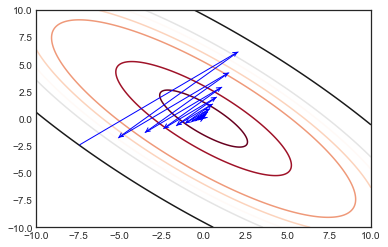

In [10]:
fig, ax = plt.subplots()
levels = [5, 20, 60, 80, 100, 120, 200]
contours = ax.contour(a, b, l, levels, cmap='RdGy')
for i in range(0, 20):
    ax.annotate('', xy=[at[i+1], bt[i+1]], xytext=[at[i], bt[i]],
                 arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1},
                 va='center', ha='center')
plt.show()

In [11]:
def gradient_descent_momentum(a0, b0, N, lr, beta=0.5):
    a = np.zeros(N)
    b = np.zeros(N)
    a[0] = a0
    b[0] = b0
    grad_mom = np.array([0, 0])
    for i in range(N-1):
        grad = gradient_loss(a[i], b[i])
        grad_mom = beta*grad_mom + (1-beta)*grad
        a[i+1] = a[i] - lr*grad_mom[0]
        b[i+1] = b[i] - lr*grad_mom[1]
    return a, b

In [12]:
at, bt = gradient_descent_momentum(-7.5, -2.5, 30, 0.2)

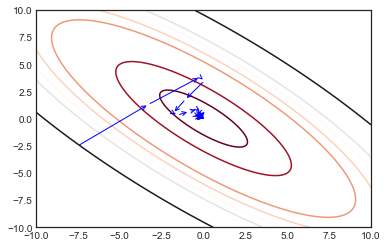

In [13]:
fig, ax = plt.subplots()
levels = [5, 20, 60, 80, 100, 120, 200]
contours = ax.contour(a, b, l, levels, cmap='RdGy')
for i in range(0, 29):
    ax.annotate('', xy=[at[i+1], bt[i+1]], xytext=[at[i], bt[i]],
                 arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1},
                 va='center', ha='center')
plt.show()